## Notebook for PVB301 XRD Analysis - Group 10

##### Author: Callum Williams

In [1]:
import pandas as pd
import numpy as np

#txt files to analyse
FILEPATH_V = 'data/V.txt'
FILEPATH_W = 'data/W.txt'
FILEPATH_Z = 'data/Z.txt'
filepaths = [FILEPATH_V, FILEPATH_W, FILEPATH_Z]

In [2]:
def get_data_line(filepath):
    """
    Parse through txt file and find the line where data begins.
    
    Args:
        filepath: the filepath to .txt file
    Returns:
        num: line number in the file
    """
    
    with open(filepath, 'r') as file:
        for num, line in enumerate(file):
            if '[Data]' in line:
                print(filepath + ':' + str(num))
                return num

for f in filepaths: 
    get_data_line(f)

data/V.txt:144
data/W.txt:144
data/Z.txt:144


In [3]:
def tabulate_file(filepath):
    """
    Turn the required data from a .txt file into a pd DataFrame.
    Args:
        filepath: the filepath to the txt file
    Returns:
        df: pd.DataFrame object containing the required data.
    """
    angles = []
    psds = []
    
    with open(filepath, 'r') as file:
        for num, line in enumerate(file):
            if num > 145:
                #simplify formatting
                angle, psd = line.split(', ')
                psd = psd.replace(',', '')
                angle = float(angle.strip())
                psd = int(psd.strip())
                #add to list
                angles.append(angle)
                psds.append(psd)
    #create df            
    frame = {'Angle':angles, 'PSD':psds}
    df = pd.DataFrame(frame)            
    return df

df_V = tabulate_file(FILEPATH_V)
df_W = tabulate_file(FILEPATH_W)
df_Z = tabulate_file(FILEPATH_Z)

In [4]:
df_V.head()

,Angle,PSD
0,20.0001,12
1,20.0154,22
2,20.0308,21
3,20.0461,18
4,20.0614,23


In [5]:
df_V.shape

(7825, 2)

In [12]:
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#interactive plotly plots, allowing us to locate peak values easily
# PURE SAMPLE V
figV = px.line(df_V, x='Angle', y='PSD', title='Pure Sample V')
figV.show()

In [23]:
# MIXED SAMPLE W
figW = px.line(df_W, x='Angle', y='PSD', title='Mixed Sample W')
figW.show()

In [24]:
# PURE SAMPLE Z
figZ = px.line(df_Z, x='Angle', y='PSD', title='Pure Sample Z')
figZ.show()

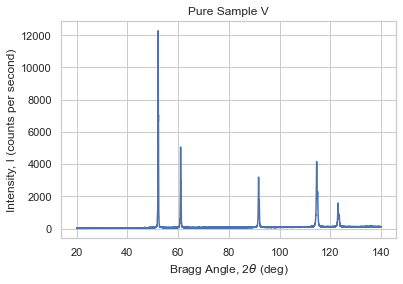

In [41]:
#better visual using seaborn
sns.set_theme(style='whitegrid')
_ = sns.lineplot(data=df_V,x='Angle', y='PSD').set_title('Pure Sample V')
_ = plt.ylabel('Intensity, I (counts per second)')
_ = plt.xlabel(r'Bragg Angle, 2$\theta$ (deg)')

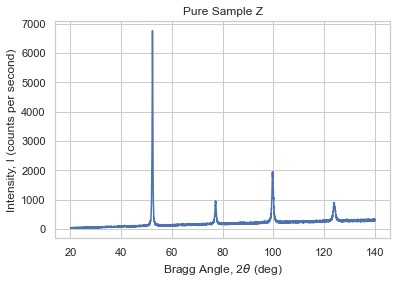

In [44]:
sns.set_theme(style='whitegrid')
_ = sns.lineplot(data=df_Z,x='Angle', y='PSD').set_title('Pure Sample Z')
_ = plt.ylabel('Intensity, I (counts per second)')
_ = plt.xlabel(r'Bragg Angle, 2$\theta$ (deg)')

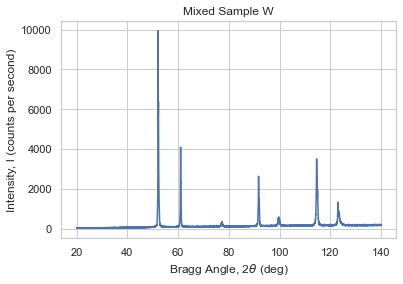

In [43]:
sns.set_theme(style='whitegrid')
_ = sns.lineplot(data=df_W,x='Angle', y='PSD').set_title('Mixed Sample W')
_ = plt.ylabel('Intensity, I (counts per second)')
_ = plt.xlabel(r'Bragg Angle, 2$\theta$ (deg)')

From the three graphs, it appears that the peaks in sample W are a combination of the peaks from sample V and sample Z. Using the Bragg equation, we can now compute the d-spacing for each pure sample (V and Z). The results are summarised in the following tables.

In [82]:
import math

WAVELENGTH = 1.78897 #x-ray wavelength - unit: angstroms

#PURE SAMPLE V
peaks_V = [(52.1617, 12280), (61.0111, 5061), (91.7617, 3194), (114.644, 4157), (123.08, 1582)]
two_theta_V = [i for i, j in peaks_V]
intensity_V = [j for i, j in peaks_V]
d_spacing_V = [WAVELENGTH/(2*math.sin(i/2)) for i in two_theta_V]
inv_d_squared_V = [1/(i*i) for i in d_spacing_V]


table_V = pd.DataFrame({r'2$\theta$':two_theta_V, 'Intensity':intensity_V, 
                        'd-spacing':d_spacing_V,'inverse of d squared':inv_d_squared_V})

table_V

,2$\theta$,Intensity,d-spacing,inverse of d squared
0,52.1617,12280,1.101157,0.824711
1,61.0111,5061,-1.132640,0.779501
2,91.7617,3194,0.944778,1.120315
3,114.6440,4157,1.280537,0.609840
4,123.0800,1582,-0.930450,1.155086


In [38]:
#PURE SAMPLE Z
peaks_Z = [(52.3304, 6757), (77.2223, 958), (99.7063, 1959), (123.923, 905)]
two_theta_Z = [i for i, j in peaks_Z]
intensity_Z = [j for i, j in peaks_Z]
d_spacing_Z = [WAVELENGTH/(2*math.sin(i/2)) for i in two_theta_Z]
d_spacing_Z


table_Z = pd.DataFrame({r'2$\theta$':two_theta_Z, 'Intensity':intensity_Z, 'd-spacing':d_spacing_Z,
                        'd-spacing':d_spacing_Z,},)
table_Z

,2$\theta$,Intensity,d-spacing
0,52.3304,6757,1.041841
1,77.2223,958,1.131181
2,99.7063,1959,-2.232042
3,123.9230,905,-1.169940


In [36]:
#MIXED SAMPLE W

peaks_W = [(52.1464, 9938), (61.0111, 4092), (77.2376, 358), (91.7464, 2631), (99.7523, 583), (114.629, 3503), (123.095, 1333)]
two_theta_W = [i for i, j in peaks_W]
intensity_W = [j for i, j in peaks_W]
d_spacing_W = [WAVELENGTH/(2*math.sin(i/2)) for i in two_theta_W]
d_spacing_W
table_W = pd.DataFrame({r'2$\theta$':two_theta_W, 'Intensity':intensity_W, 'd-spacing':d_spacing_W})
table_W

,2$\theta$,Intensity,d-spacing
0,52.1464,9938,1.107271
1,61.0111,4092,-1.132640
2,77.2376,358,1.124555
3,91.7464,2631,0.942355
4,99.7523,583,-2.356569
5,114.6290,3503,1.290488
6,123.0950,1333,-0.932479
